# Trees and Forests
## Introduction
Tree-based learning algorithms are a broad and popular family of related non-parametric, *supervised* methods for both classification and regression. The basis of tree-based learners is the *decision tree* wherein a series of decision rules (e.g., “If their gender is male…”) are chained. The result looks vaguely like an upside-down tree, with the first decision rule at the top and subsequent decision rules spreading out below. In a decision tree, every decision rule occurs at a decision node, with the rule creating branches leading to new nodes. A branch without a decision rule at the end is called a leaf.

One reason for the popularity of tree-based models is their interpretability. In fact, decision trees can literally be drawn out in their complete form (as you will see) to create a highly intuitive model. From this basic tree system comes a wide variety of extensions from random forests to stacking. In this guided assignment, we will cover how to train, handle, adjust, visualize, and evaluate tree-based models.


The basis of tree-based learners is the decision tree wherein a series of decision rules are chained. 
* https://www.stat.berkeley.edu/~breiman/RandomForests/

## 1. Training a Decision Tree Classifier


### Problem

You need to train a classifier using a decision tree.
### Solution

Use scikit-learn’s `DecisionTreeClassifier`:


In [1]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Create decision tree classifier object
decisiontree = DecisionTreeClassifier(random_state=0)

# Train model
model = decisiontree.fit(features, target)

### Discussion
DDecision tree learners attempt to find a decision rule that produces the greatest decrease in impurity at a node. While there are a number of measurements of impurity, by default `DecisionTreeClassifier` uses Gini impurity:
$$
G(t) = 1 - \sum_{i=1}^c{p_i^2}
$$
where $G(t)$ is the Gini impurity at node $t$ and $p_i$ is the proportion of observations of class $c$ at node $t$.

This process of finding the decision rules that create splits to decrease impurity is repeated recursively until all leaf nodes are pure (i.e., contain only one class) or some arbitrary cut-off is reached.

In scikit-learn, `DecisionTreeClassifier` operates like other learning methods; after the model is trained using `fit` we can use the model to predict the class of an observation:

In [2]:
# Make new observation
observation = [[ 5,  4,  3,  2]]

# Predict observation's class
model.predict(observation)

array([1])

We can also see the predicted class probabilities of the observation:

In [3]:
# View predicted class probabilities for the three classes
model.predict_proba(observation)

array([[0., 1., 0.]])

Finally, if we want to use a different impurity measurement we can use the `criterion` parameter:

In [4]:
# Create decision tree classifier object using entropy
decisiontree_entropy = DecisionTreeClassifier(
    criterion='entropy', random_state=0)

# Train model
model_entropy = decisiontree_entropy.fit(features, target)

### See Also
* [Decision Tree Learning, Princeton](https://www.cs.princeton.edu/courses/archive/spr07/cos424/papers/mitchell-dectrees.pdf)


## 2. Training a Decision Tree Regressor
### Problem

You need to train a regression model using a decision tree.
### Solution

Use scikit-learn’s `DecisionTreeRegressor`:

In [ ]:
# Load libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets

# Load data with only two features
boston = datasets.load_boston()
features = boston.data[:,0:2]
target = boston.target

# Create decision tree regressor object
decisiontree = DecisionTreeRegressor(random_state=0)

# Train model
model = decisiontree.fit(features, target)

### Discussion
Decision tree regression works similarly to decision tree classification; however, instead of reducing Gini impurity or entropy, potential splits are by default measured on how much they reduce mean squared error (MSE):
$$
MSE = \frac{1}{n} \sum_{i=1}^{n}{(y_i - \hat y_i)^2}
$$

where $y_i$ is the true value of the target and $\hat y_i$ is the mean value. In scikit-learn, decision tree regression can be conducted using `DecisionTreeRegressor`. Once we have trained a decision tree, we can use it to predict the target value for an observation:

In [ ]:
# Make new observation
observation = [[0.02, 16]]

# Predict observation's value
model.predict(observation)

Just like with `DecisionTreeClassifier` we can use the `criterion` parameter to select the desired measurement of split quality. For example, we can construct a tree whose splits reduce mean absolute error (MAE):

In [ ]:
# Create decision tree classifier object using mae
decisiontree_mae = DecisionTreeRegressor(criterion="mae", random_state=0)

# Train model
model_mae = decisiontree_mae.fit(features, target)

### See Also
* [Decision Tree Regression, scikit-learn](http://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html)
* [An Introduction to Data Science, Decision Tree - Regression](http://saedsayad.com/decision_tree_reg.htm)

## 3. Visualizing a Decision Tree Model
### Problem

You need to visualize a model created by a decision tree learning algorithm.
### Solution

Export the decision tree model into DOT format, then visualize:


### <span style="color:red"> Warning:  Install the `pydotplus` module.</span>  
One approach is to use Anaconda Navigator and add it to your current environment.

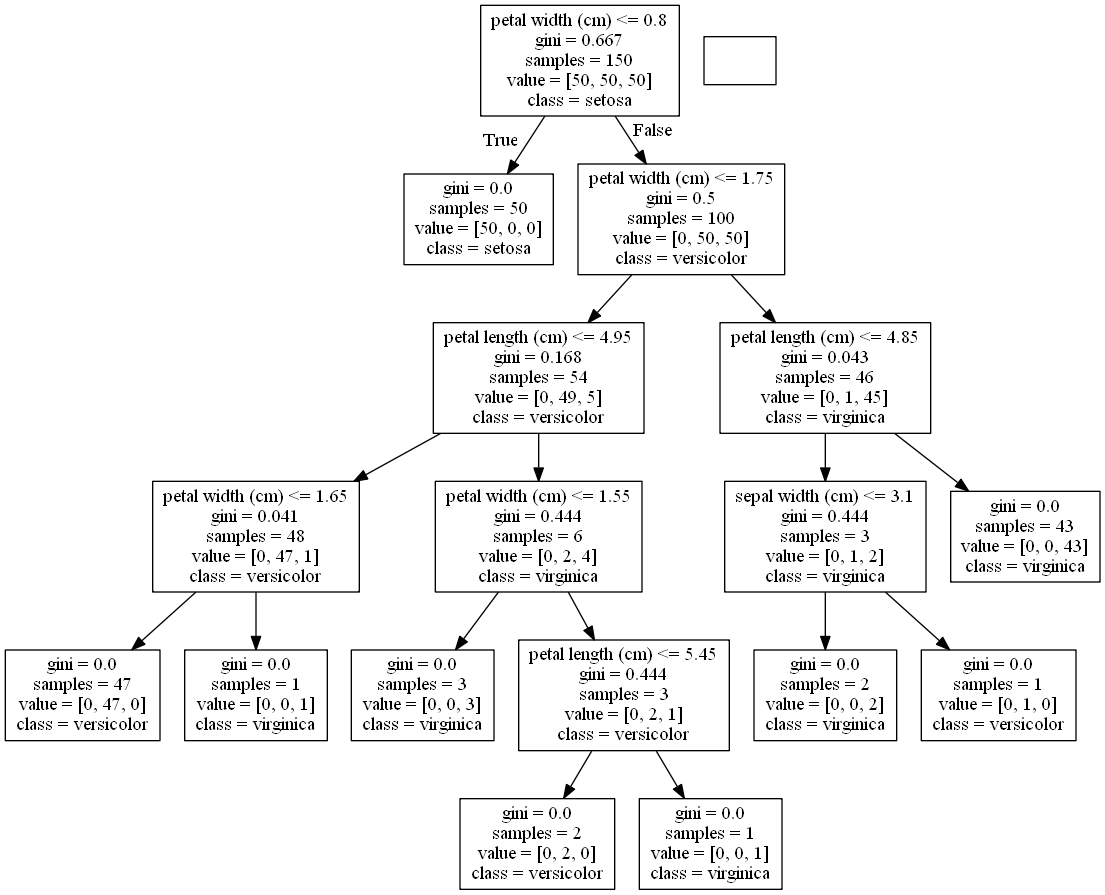

In [1]:
# Load libraries
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image
from sklearn import tree

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Create decision tree classifier object
decisiontree = DecisionTreeClassifier(random_state=0)

# Train model
model = decisiontree.fit(features, target)

# Create DOT data
dot_data = tree.export_graphviz(decisiontree,
                                out_file=None,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Discussion

One of the advantages of decision tree classifiers is that we can visualize the entire trained model—making decision trees one of the most interpretable models in machine learning. In our solution, we exported our trained model in DOT format (a graph description language) and then used that to draw the graph.

If we look at the root node, we can see the decision rule is that if petal widths are less than or equal to 0.8, then go to the left branch; if not, go to the right branch. We can also see the Gini impurity index (0.667), the number of observations (150), the number of observations in each class ([50,50,50]), and the class the observations would be predicted to be if we stopped at that node (setosa). We can also see that at that node the learner found that a single decision rule (petal width (cm) <= 0.8) was able to perfectly identify all of the setosa class observations. Furthermore, with one more decision rule with the same feature (petal width (cm) <= 1.75) the decision tree is able to correctly classify 144 of 150 observations. This makes petal width a very important feature!

If we want to use the decision tree in other applications or reports, we can easily export the visualization into PDF or a PNG image:

In [ ]:
# Create PDF
graph.write_pdf("iris.pdf")

In [ ]:
# Create PNG
graph.write_png("iris.png")

While this solution visualized a decision tree classifier, it can just as easily be used to visualize a decision tree regressor.

Note: macOS users might have to install GraphViz’s executable to run the preceding code. This can be done using Homebrew: brew install graphviz. For Homebrew installation instructions, visit Homebrew’s website.

### See Also

* [Homebrew](https://brew.sh/)



## 4. Training a Random Forest Classifier

### Problem

You want to train a classification model using a “forest” of randomized decision trees.
### Solution

Train a random forest classification model using scikit-learn’s `RandomForestClassifier`:

In [ ]:
# Load libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

# Train model
model = randomforest.fit(features, target)

### Discussion

A common problem with decision trees is that they tend to fit the training data too closely (*overfitting*). This has motivated the widespread use of an *ensemble learning* method called *random forest*. In a random forest, many decision trees are trained, but each tree only receives a *bootstrapped* sample of observations (i.e., a random sample of observations with replacement that matches the original number of observations) and each node only considers a subset of features when determining the best split. This forest of randomized decision trees (hence the name) votes to determine the predicted class.

As we can see by comparing this solution to that of a decision tree, scikit-learn’s `RandomForestClassifier` works similarly to `DecisionTreeClassifier`:

In [ ]:
# Make new observation
observation = [[ 5,  4,  3,  2]]

# Predict observation's class
model.predict(observation)

`RandomForestClassifier` also uses many of the same parameters as `DecisionTreeClassifier`. For example, we can change the measure of split quality used:

In [ ]:
# Create random forest classifier object using entropy
randomforest_entropy = RandomForestClassifier(
    criterion="entropy", random_state=0)

# Train model
model_entropy = randomforest_entropy.fit(features, target)

However, being a forest rather than an individual decision tree, `RandomForestClassifier` has certain parameters that are either unique to random forests or particularly important. First, the `max_features` parameter determines the maximum number of features to be considered at each node and takes a number of arguments including integers (number of features), floats (percentage of features), and sqrt (square root of the number of features). By default, `max_features` is set to auto, which acts the same as sqrt. Second, the `bootstrap` parameter allows us to set whether the subset of observations considered for a tree is created using sampling with replacement (the default setting) or without replacement. Third, `n_estimators` sets the number of decision trees to include in the forest. Note that we can treat `n_estimators` as a hyperparameter and visualize the effect of increasing the number of trees on an evaluation metric. Finally, while not specific to random forest classifiers, because we are effectively training many decision tree models, it is often useful to use all available cores by setting `n_jobs=-1`.

### See Also

* [Random Forests, Berkeley Statistics](https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm)



## 5. Training a Random Forest Regressor

### Problem
You want to train a regression model using a “forest” of randomized decision trees.
### Solution

Train a random forest regression model using scikit-learn’s RandomForestRegressor:

In [ ]:
# Load libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets

# Load data with only two features
boston = datasets.load_boston()
features = boston.data[:,0:2]
target = boston.target

# Create random forest regressor object
randomforest = RandomForestRegressor(random_state=0, n_jobs=-1)

# Train model
model = randomforest.fit(features, target)

### Discussion

Just like how we can make a forest of decision tree classifiers, we can make a forest of decision tree regressors where each tree uses a bootstrapped subset of observations and at each node the decision rule considers only a subset of features. As with `RandomForestClassifier` we have certain important parameters:

* `max_features` sets the maximum number of features to consider at each node. Defaults to $p$ features, where $p$ is the total number of features.

* `bootstrap` sets whether or not to sample with replacement. Defaults to `True`.

* `n_estimators` sets the number of decision trees to construct. Defaults to 10.

### See Also

* [RandomForestRegressor, scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)



## 6. Identifying Important Features in Random Forests

### Problem

You need to know which features are most important in a random forest model.
### Solution

Calculate and visualize the importance of each feature:

In [ ]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

# Train model
model = randomforest.fit(features, target)

# Calculate feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [iris.feature_names[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(features.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(features.shape[1]), names, rotation=90)

# Show plot
plt.show()

### Discussion

One of the major benefits of decision trees is interpretability. Specifically, we can visualize the entire model. However, a random forest model is comprised of tens, hundreds, even thousands of decision trees. This makes a simple, intuitive visualization of a random forest model impractical. That said, there is another option: we can compare (and visualize) the relative importance of each feature.

We have visualized a decision tree classifier model and saw that decision rules based only on petal width were able to classify many observations correctly. Intuitively, we can say that this means that petal width is an important feature in our classifier. More formally, features with splits that have the greater mean decrease in impurity (e.g., Gini impurity or entropy in classifiers and variance in regressors) are considered more important.

However, there are two things to keep in mind regarding feature importance. First, scikit-learn requires that we break up nominal categorical features into multiple binary features. This has the effect of spreading the importance of that feature across all of the binary features and can often make each feature appear to be unimportant even when the original nominal categorical feature is highly important. Second, if two features are highly correlated, one feature will claim much of the importance, making the other feature appear to be far less important -- which has implications for interpretation, if not considered.

In scikit-learn, classification and regression decision trees and random forests can report the relative importance of each feature using the `feature_importances_ method`:

In [ ]:
# View feature importances
model.feature_importances_

The higher the number, the more important the feature (all importance scores sum to 1). By plotting these values we can add interpretability to our random forest models.

## 7. Selecting Important Features in Random Forests

### Problem

You need to conduct feature selection on a random forest.
### Solution

Identify the importance features and retrain the model using only the most important features:

In [ ]:
# Load libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Create random forest classifier
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

# Create object that selects features with importance greater
# than or equal to a threshold
selector = SelectFromModel(randomforest, threshold=0.3)

# Feature new feature matrix using selector
features_important = selector.fit_transform(features, target)

# Train random forest using most important featres
model = randomforest.fit(features_important, target)

### Discussion

There are situations where we might want to reduce the number of features in our model. For example, we might want to reduce the model’s variance or we might want to improve interpretability by including only the most important features.

In scikit-learn we can use a simple two-stage workflow to create a model with reduced features. First, we train a random forest model using all features. Then, we use this model to identify the most important features. Next, we create a new feature matrix that includes only these features. In our solution, we used the `SelectFromModel` method to create a feature matrix containing only features with an importance greater than or equal to some `threshold` value. Finally, we created a new model using only those features.

It must be noted that there are two caveats to this approach. First, nominal categorical features that have been one-hot encoded will see the feature importance diluted across the binary features. Second, the feature importance of highly correlated features will be effectively assigned to one feature and not evenly distributed across both features.


### See Also
* [Variable selection using Random Forests, Robin Genuer, Jean-Michel Poggi, Christine Tuleau-Malot](https://hal.archives-ouvertes.fr/file/index/docid/755489/filename/PRLv4.pdf)

## 8. Handling Imbalanced Classes


### Problem

You have a target vector with highly imbalanced classes and want to train a random forest model.
### Solution

Train a decision tree or random forest model with `class_weight="balanced"`:

In [ ]:
# Load libraries
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Make class highly imbalanced by removing first 40 observations
features = features[40:,:]
target = target[40:]

# Create target vector indicating if class 0, otherwise 1
target = np.where((target == 0), 0, 1)

# Create random forest classifier object
randomforest = RandomForestClassifier(
    random_state=0, n_jobs=-1, class_weight="balanced")

# Train model
model = randomforest.fit(features, target)

### Discussion

Imbalanced classes are a common problem when we are doing machine learning in the real world. Left unaddressed, the presence of imbalanced classes can reduce the performance of our model. Many learning algorithms in scikit-learn come with built-in methods for correcting for imbalanced classes. We can set `RandomForestClassifier` to correct for imbalanced classes using the `class_weight` parameter. If supplied with a dictionary in the form of class names and respective desired weights (e.g., {"male": 0.2, "female": 0.8}), `RandomForestClassifier` will weight the classes accordingly. However, often a more useful argument is `balanced`, wherein classes are automatically weighted inversely proportional to how frequently they appear in the data:

$$
w_j= \dfrac{n}{k n_j}
$$

where $w_j$ is the weight of class $j$, $n$ is the number of observations, $n_j$ is the number of observations in class $j$, and $k$ is the total number of classes. For example, in our solution we have 2 classes ($k = 2$), 110 observations ($n = 100$), and 10 and 100 observations in each class, respectively ($n_1 = 10, n_2 = 100$). If we weight the classes using `class_weight="balanced"`, then the smaller class is weighted more:

In [ ]:
# Calculate weight for small class
110/(2*10)

while the larger class is weighted less:

In [ ]:
# Calculate weight for large class
110/(2*100)

## 9. Controlling Tree Size

### Problem

You want to manually determine the structure and size of a decision tree.
### Solution

Use the tree structure parameters in scikit-learn tree-based learning algorithms:

In [ ]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Create decision tree classifier object
decisiontree = DecisionTreeClassifier(random_state=0,
                                      max_depth=None,
                                      min_samples_split=2,
                                      min_samples_leaf=1,
                                      min_weight_fraction_leaf=0,
                                      max_leaf_nodes=None,
                                      min_impurity_decrease=0)

# Train model
model = decisiontree.fit(features, target)

### Discussion

scikit-learn’s tree-based learning algorithms have a variety of techniques for controlling the size of the decision tree(s). These are accessed through parameters:

* max_depth: Maximum depth of the tree. If None, the tree is grown until all leaves are pure. If an integer, the tree is effectively “pruned” to that depth.


* min_samples_split: Minimum number of observations at a node before that node is split. If an integer is supplied as an argument it determines the raw minimum, while if a float is supplied the minimum is the percent of total observations.


* min_samples_leaf: Minimum number of observations required to be at a leaf. Uses the same arguments as `min_samples_split`.


* max_leaf_nodes: Maximum number of leaves.


* min_impurity_split: Minimum impurity decrease required before a split is performed.


While it is useful to know these parameters exist, most likely we will only be using `max_depth` and `min_impurity_split` because shallower trees (sometimes called stumps) are simpler models and thus have lower variance.

## 10. Improving Performance Through Boosting

### Problem

You need a model with better performance than decision trees or random forests.
### Solution

Train a boosted model using `AdaBoostClassifier` or `AdaBoostRegressor`:

In [ ]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Create adaboost tree classifier object
adaboost = AdaBoostClassifier(random_state=0)

# Train model
model = adaboost.fit(features, target)

### Discussion

In random forest, an ensemble (group) of randomized decision trees predicts the target vector. An alternative, and often more powerful, approach is called *boosting*. In one form of boosting called *AdaBoost*, we iteratively train a series of weak models (most often a shallow decision tree, sometimes called a stump), each iteration giving higher priority to observations the previous model predicted incorrectly. More specifically, in AdaBoost:

1.    Assign every observation, $x_i$, an initial weight value, $w_i=\dfrac{1}{n}$, where $n$ is the total number of observations in the data.

2.    Train a “weak” model on the data.

3.    For each observation:

     a. If weak model predicts $x_i$ correctly, $w_i$ is decreased.
     
     b. If weak model predicts $x_i$ incorrectly, $w_i$ is increased.
     

4.    Train a new weak model where observations with greater $w_i$ are given greater priority.

5.    Repeat steps 4 and 5 until the data is perfectly predicted or a preset number of weak models has been trained.

The end result is an aggregated model where individual weak models focus on more difficult (from a prediction perspective) observations. In scikit-learn, we can implement AdaBoost using `AdaBoostClassifier` or `AdaBoostRegressor`. The most important parameters are `base_estimator`, `n_estimators`, and `learning_rate`:

* `base_estimator` is the learning algorithm to use to train the weak models. This will almost always not need to be changed because by far the most common learner to use with AdaBoost is a decision tree—the parameter’s default argument.


* `n_estimators` is the number of models to iteratively train.


* `learning_rate` is the contribution of each model to the weights and defaults to 1. Reducing the learning rate will mean the weights will be increased or decreased to a small degree, forcing the model to train slower (but sometimes resulting in better performance scores).


* `loss` is exclusive to `AdaBoostRegressor` and sets the loss function to use when updating weights. This defaults to a linear loss function, but can be changed to square or exponential.

### See Also

* [Explaining AdaBoost, Robert E. Schapire](http://rob.schapire.net/papers/explaining-adaboost.pdf)



## 11. Evaluating Random Forests with Out-of-Bag Errors


### Problem

You need to evaluate a random forest model without using cross-validation.
### Solution

Calculate the model’s out-of-bag score:

In [ ]:
# Load libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Create random tree classifier object
randomforest = RandomForestClassifier(
    random_state=0, n_estimators=1000, oob_score=True, n_jobs=-1)

# Train model
model = randomforest.fit(features, target)

# View out-of-bag-error
randomforest.oob_score_

### Discussion

In random forests, each decision tree is trained using a bootstrapped subset of observations. This means that for every tree there is a separate subset of observations not being used to train that tree. These are called *out-of-bag* (OOB) observations. We can use OOB observations as a test set to evaluate the performance of our random forest.

For every observation, the learning algorithm compares the observation’s true value with the prediction from a subset of trees not trained using that observation. The overall score is calculated and provides a single measure of a random forest’s performance. OOB score estimation is an alternative to cross-validation (more on this later...).

In scikit-learn, we can OOB scores of a random forest by setting `oob_score=True` in the random forest object (i.e., `RandomForestClassifier`). The score can be retrieved using `oob_score_`.
